### Stock Analysis With Time series Data

In [33]:
## install pandas pandas data Reader
!pip install pandas-datareader

In [34]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [35]:
df_tesla=pdr.get_data_yahoo('TSLA')
df_tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-23,835.299988,760.559998,830.429993,764.039978,31752300.0,764.039978
2022-02-24,802.479980,700.000000,700.390015,800.770020,45107400.0,800.770020
2022-02-25,819.500000,782.400024,809.229980,809.869995,25355900.0,809.869995
2022-02-28,876.859985,814.710022,815.010010,870.429993,33002300.0,870.429993
2022-03-01,889.880005,853.780029,869.679993,864.369995,24840000.0,864.369995


<AxesSubplot:xlabel='Date'>

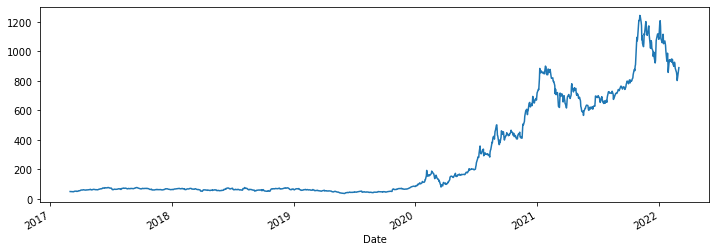

In [36]:
df_tesla['High'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

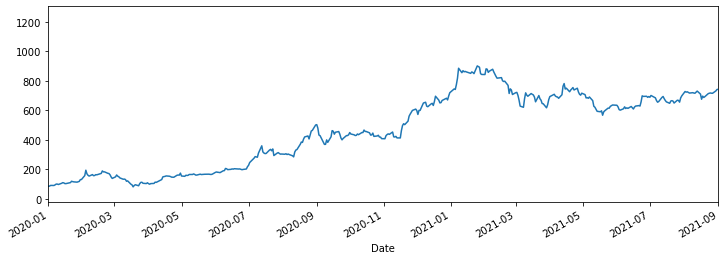

In [37]:
## X limit & y limit
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],figsize=(12,4))

<AxesSubplot:xlabel='Date'>

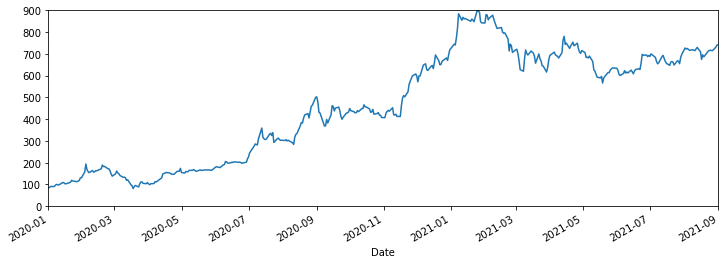

In [38]:
## ## X limit & y limit
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,900],figsize=(12,4))

<AxesSubplot:xlabel='Date'>

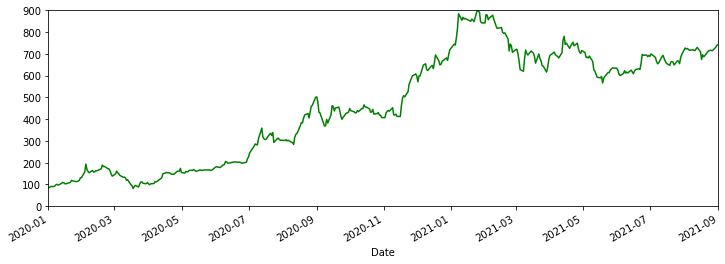

In [39]:
 ## ## X limit, y limit & coloring
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,900],figsize=(12,4),color='green')

<AxesSubplot:xlabel='Date'>

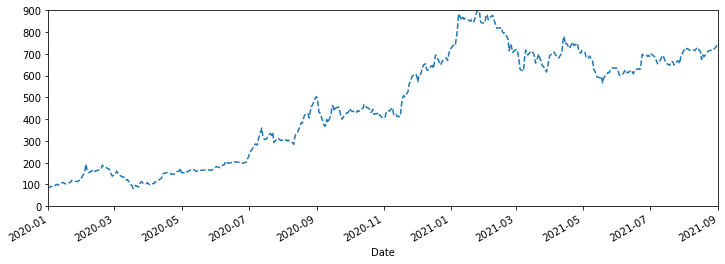

In [40]:
## ## X limit & y limit
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,900],figsize=(12,4),ls='--')

In [41]:
## 
df_tesla.index

DatetimeIndex(['2017-03-02', '2017-03-03', '2017-03-06', '2017-03-07',
               '2017-03-08', '2017-03-09', '2017-03-10', '2017-03-13',
               '2017-03-14', '2017-03-15',
               ...
               '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18',
               '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25',
               '2022-02-28', '2022-03-01'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)

In [42]:
#df_tesla['2020-01-01':'2021-09-01']
index=df_tesla['2020-01-01':'2021-09-01'].index ##if i want to specifically print index
share_open=df_tesla['2020-01-01':'2021-09-01']['Open']

In [43]:
share_open

Date
2020-01-02     84.900002
2020-01-03     88.099998
2020-01-06     88.094002
2020-01-07     92.279999
2020-01-08     94.739998
                 ...    
2021-08-26    708.309998
2021-08-27    705.000000
2021-08-30    714.719971
2021-08-31    733.000000
2021-09-01    734.080017
Name: Open, Length: 421, dtype: float64

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

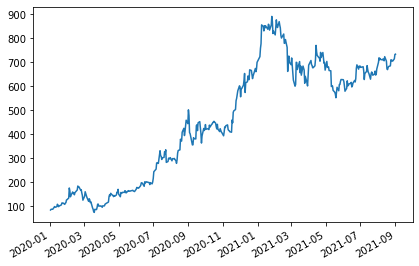

In [45]:
figure,axis=plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()  ##Preventing overlapping
axis.plot(index,share_open)

## datetime index

In [46]:
## First reset the index
df_tesla=df_tesla.reset_index()

In [47]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   High       1259 non-null   float64       
 2   Low        1259 non-null   float64       
 3   Open       1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Volume     1259 non-null   float64       
 6   Adj Close  1259 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 69.0 KB


## Time Resampling

In [48]:
df_tesla=df_tesla.set_index('Date',drop=True)

In [49]:
df_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999
2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001
...,...,...,...,...,...,...
2022-02-23,835.299988,760.559998,830.429993,764.039978,31752300.0,764.039978
2022-02-24,802.479980,700.000000,700.390015,800.770020,45107400.0,800.770020
2022-02-25,819.500000,782.400024,809.229980,809.869995,25355900.0,809.869995


In [50]:
df_tesla.resample(rule='A').min()  # miniman data through end of year & frequency(rule='A')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,49.299999,48.556000,48.964001,48.737999,14597000.0,48.737999
2018-12-31,52.066002,48.917999,50.556000,50.112000,15403500.0,50.112000
2019-12-31,37.335999,35.397999,36.220001,35.793999,12328000.0,35.793999
2020-12-31,80.972000,70.101997,74.940002,72.244003,17357700.0,72.244003
2021-12-31,566.210022,539.489990,552.549988,563.000000,9800600.0,563.000000
2022-12-31,802.479980,700.000000,700.390015,764.039978,16909700.0,764.039978


In [51]:
## for max
df_tesla.resample(rule='A').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,77.921997,75.870003,77.337997,77.000000,98957000.0,77.000000
2018-12-31,77.491997,73.424004,75.000000,75.914001,168248500.0,75.914001
2019-12-31,87.061996,85.269997,87.000000,86.188004,150030500.0,86.188004
2020-12-31,718.719971,691.119995,699.989990,705.669983,304694000.0,705.669983
2021-12-31,1243.489990,1217.000000,1234.410034,1229.910034,89396500.0,1229.910034
2022-12-31,1208.000000,1136.040039,1189.550049,1199.780029,50521900.0,1199.780029


<AxesSubplot:xlabel='Date'>

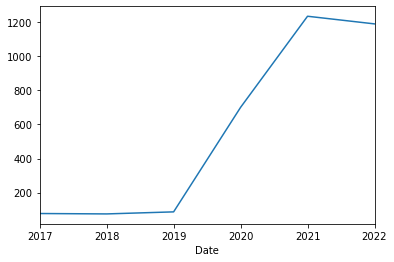

In [52]:
df_tesla.resample(rule='A').max()['Open'].plot()

<AxesSubplot:xlabel='Date'>

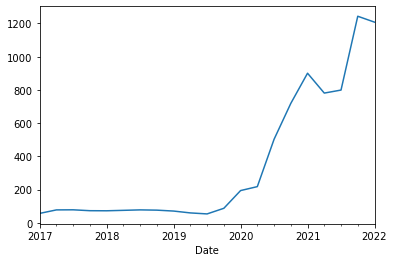

In [53]:
## Quaterly data record
df_tesla.resample(rule='QS').max()['High'].plot()

In [54]:
## Business & Frequency
df_tesla.resample(rule='BA').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-29,77.921997,75.870003,77.337997,77.000000,98957000.0,77.000000
2018-12-31,77.491997,73.424004,75.000000,75.914001,168248500.0,75.914001
2019-12-31,87.061996,85.269997,87.000000,86.188004,150030500.0,86.188004
2020-12-31,718.719971,691.119995,699.989990,705.669983,304694000.0,705.669983
2021-12-31,1243.489990,1217.000000,1234.410034,1229.910034,89396500.0,1229.910034
2022-12-30,1208.000000,1136.040039,1189.550049,1199.780029,50521900.0,1199.780029


<AxesSubplot:xlabel='Date'>

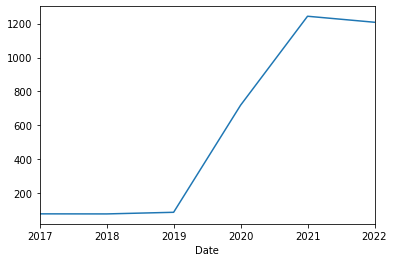

In [55]:
df_tesla.resample(rule='BA').max()['High'].plot()

<AxesSubplot:xlabel='Date'>

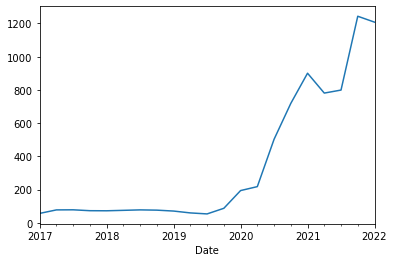

In [56]:
## Quaterly
df_tesla.resample(rule='BQS').max()['High'].plot()

<AxesSubplot:xlabel='Date'>

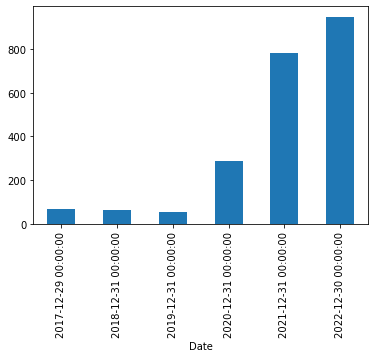

In [57]:
## plotting
df_tesla['Open'].resample(rule='BA').mean().plot(kind='bar')

<AxesSubplot:xlabel='Date'>

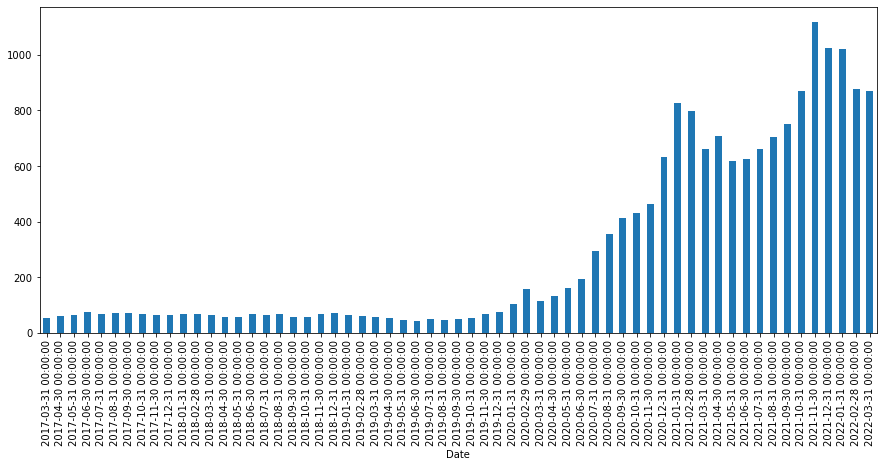

In [58]:
df_tesla['Open'].resample(rule='M').mean().plot(kind='bar',figsize=(15,6))

In [59]:
df_tesla['High']

Date
2017-03-02     50.655998
2017-03-03     50.380001
2017-03-06     50.340000
2017-03-07     50.778000
2017-03-08     50.014000
                 ...    
2022-02-23    835.299988
2022-02-24    802.479980
2022-02-25    819.500000
2022-02-28    876.859985
2022-03-01    889.880005
Name: High, Length: 1259, dtype: float64

In [61]:
df_tesla['High'].rolling(10).mean()

Date
2017-03-02           NaN
2017-03-03           NaN
2017-03-06           NaN
2017-03-07           NaN
2017-03-08           NaN
                 ...    
2022-02-23    905.175000
2022-02-24    890.795996
2022-02-25    878.364996
2022-02-28    874.454993
2022-03-01    873.554993
Name: High, Length: 1259, dtype: float64

In [62]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999
2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001


In [67]:
df_tesla['High'].rolling(10).mean().head(10)

Date
2017-03-02        NaN
2017-03-03        NaN
2017-03-06        NaN
2017-03-07        NaN
2017-03-08        NaN
2017-03-09        NaN
2017-03-10        NaN
2017-03-13        NaN
2017-03-14        NaN
2017-03-15    50.4394
Name: High, dtype: float64

In [68]:
df_tesla['Open: 30 days Rolling']=df_tesla['Open'].rolling(30).mean()

In [70]:
df_tesla.head(30)

,High,Low,Open,Close,Volume,Adj Close,Open: 30 days Rolling
Date,,,,,,,
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001,NaN
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999,NaN
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001,NaN
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999,NaN
2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001,NaN
2017-03-09,49.731998,48.599998,49.526001,48.980000,19396500.0,48.980000,NaN
2017-03-10,49.299999,48.599998,49.242001,48.737999,15331500.0,48.737999,NaN
2017-03-13,49.369999,48.556000,48.964001,49.234001,15113000.0,49.234001,NaN
2017-03-14,51.624001,49.203999,49.222000,51.599998,37992000.0,51.599998,NaN


<AxesSubplot:xlabel='Date'>

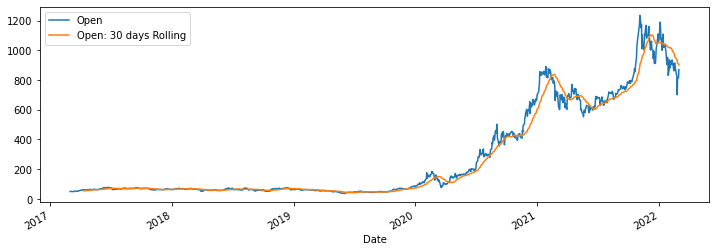

In [72]:
df_tesla[['Open','Open: 30 days Rolling']].plot(figsize=(12,4))

1. Read the Microsoft Data using Pandas Data reader
2. Get the maximum price of the share from 2017 to 2022
3. Which is the date of the highest price of the stock?
4. Which is the date of the lowest price of the stock?